In [23]:
import os
import datetime
import pickle
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

from data_utils import plot_image

from sentinelhub import (
    MimeType,
    CRS,
    BBox,
    SentinelHubRequest,
    SentinelHubDownloadClient,
    DataCollection,
    bbox_to_dimensions,
    DownloadRequest,
    MosaickingOrder,
    SHConfig, 
    geo_utils
)

In [24]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Configure the data to be acquired**  
Use http://bboxfinder.com/ to generate bboxes, and make sure note to create data for overlapping regions within the same dataset.

In [42]:
coords = [12.436111,63.092459,12.907150,63.297136]
resolution = 10
time_interval = ("2020-06-01", "2020-09-30")

save_path_raw = '..\\data\\SentinelLandCoverSweden\\raw'                                # Where the request from Sentinel Hub will be stored

In [43]:
bbox = BBox(bbox=coords, crs=CRS.WGS84)
bbox_size = bbox_to_dimensions(bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {bbox_size} pixels")

Image shape at 10 m resolution: (2452, 2193) pixels


**Configure Sentinel Hub account details**

In [44]:
config = SHConfig()

config.instance_id = '29ae2984-0110-4b3a-ae12-86c7a788de4f'
config.sh_client_id = '0eb5fcd8-45c9-4183-85d7-142f433cd4f5'
config.sh_client_secret = '3zVP}|yt9^0h94Xy~m^u{KzHrxvW1bz&Dv%h3/x]'

config.save()

**Download and view the image**

In [45]:
evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12", "AOT"]
            }],
            output: {
                bands: 13
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B01, sample.B02, sample.B03, sample.B04, sample.B05, sample.B06, sample.B07, sample.B08, sample.B8A, sample.B09, sample.B11, sample.B12, sample.AOT];
    }
"""

request = SentinelHubRequest(
    data_folder = save_path_raw,
    evalscript = evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=time_interval,
            mosaicking_order=MosaickingOrder.LEAST_CC,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.TIFF)],
    bbox=bbox,
    size=bbox_size,
    config=config,
)
img = request.get_data(save_data=True)[0]

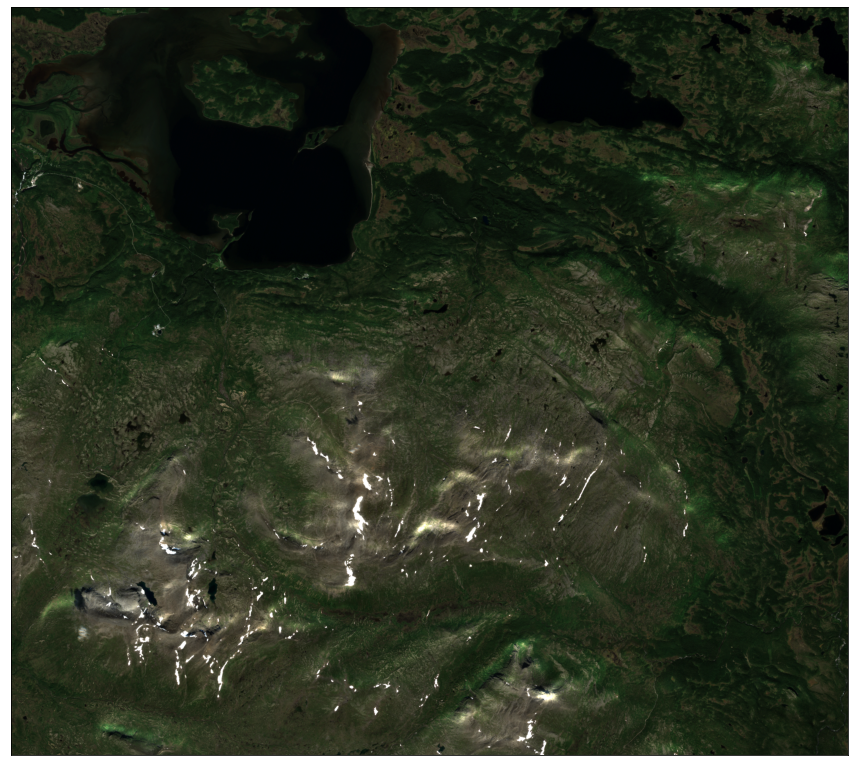

In [46]:
plot_image(np.moveaxis(np.moveaxis(img, -1, 0)[[3, 2, 1]], 0, -1), factor=3.5 / 255, clip_range=(0, 1))